# Portfolio assignment 16
30 min: Train a decision tree to predict one of the categorical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

### Attibute information
- age
- sex
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- thalach = maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
heart = pd.read_csv('Assignment 4 - Heart.csv', sep=',')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

## Transformation

In [3]:
heart.sex = heart.sex.map( {0:"Female" , 1:"Male"} )
heart.fbs = heart.fbs.map( {0:False , 1:True} )
heart.exang = heart.exang.map( {0:False , 1:True} )
heart.target = heart.target.map( {0:"No diseas", 1:"Disease"})
heart.thal = heart.thal.map( {0:"Normal", 1:"Fixed defect", 2:"Reversable defect"})
heart.cp = heart.cp.map( {0:"None", 1:"Minor", 2:"Severe", 3:"Major"})
heart.slope = heart.slope.map( {0:"None", 1:"Minor", 2:"Major"})

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,Major,145,233,True,0,150,False,2.3,None,0,Fixed defect,Disease
1,37,Male,Severe,130,250,False,1,187,False,3.5,None,0,Reversable defect,Disease
2,41,Female,Minor,130,204,False,0,172,False,1.4,Major,0,Reversable defect,Disease
3,56,Male,Minor,120,236,False,1,178,False,0.8,Major,0,Reversable defect,Disease
4,57,Female,None,120,354,False,1,163,True,0.6,Major,0,Reversable defect,Disease


## Test/train split

In [5]:
heart_train, heart_test = train_test_split(heart, test_size=0.3, stratify=heart['sex'], random_state=42)
print(heart_train.shape, heart_test.shape)

(212, 14) (91, 14)


In [10]:
features = ['trestbps']
dt_classification = DecisionTreeClassifier(max_depth = 5) # Increase max_depth to see effect in the plot
dt_classification.fit(heart_train[features], heart_train['sex'])

DecisionTreeClassifier(max_depth=5)

In [11]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree_categorical_heart")

    # Display in the notebook
    return graph 

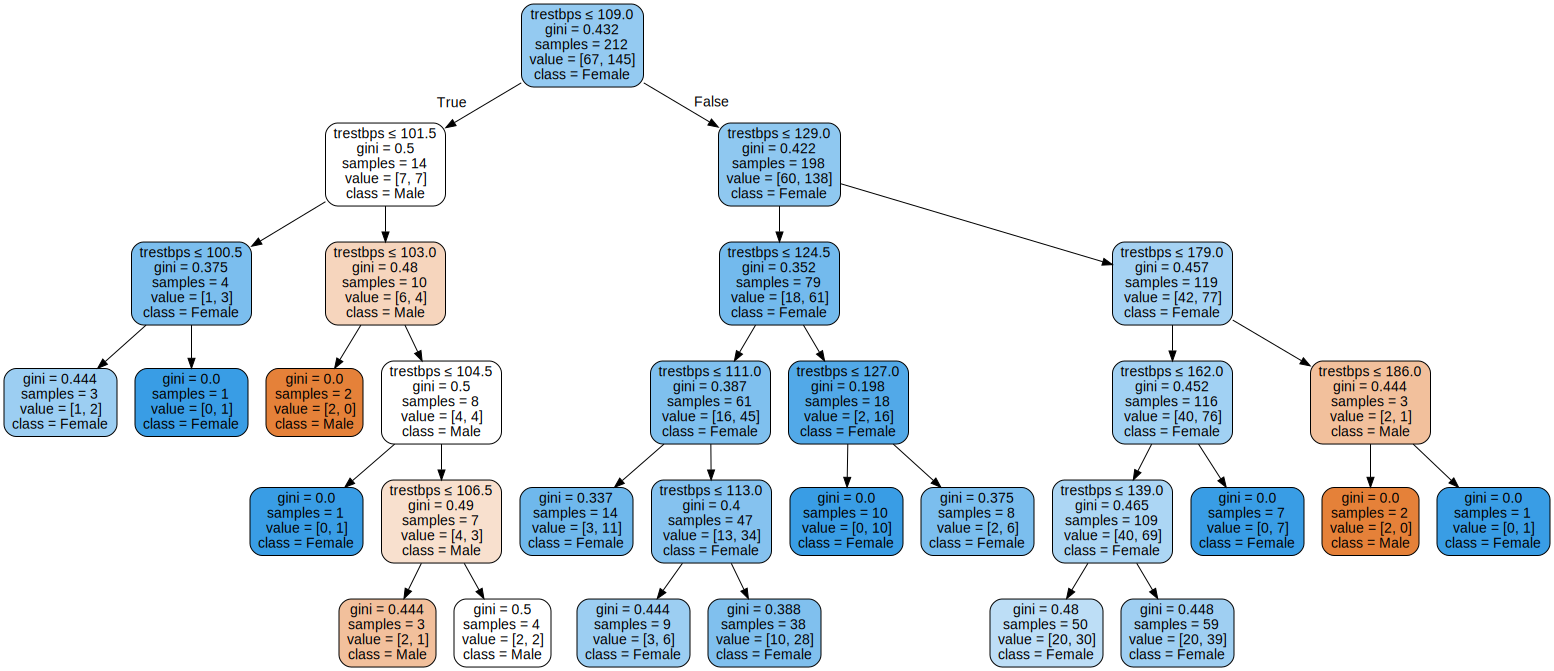

In [12]:
plot_tree_classification(dt_classification, features, heart.sex.unique())

In [15]:
predictionsOnTrainset = dt_classification.predict(heart_train[features])
predictionsOnTestset = dt_classification.predict(heart_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, heart_train.sex)
accuracyTest = calculate_accuracy(predictionsOnTestset, heart_test.sex)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.7075471698113207
Accuracy on test set 0.6813186813186813
